# 워드 클라우드 - SOYNLP version

In [1]:
import re, joblib

In [2]:

with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리

In [4]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사 추출

In [5]:
# konlpy 에서는 form konlpy.tag import Okt; okt = Okt(); okt.nouns(new_gift_text)
from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounLMatchTokenizer(noun_scores)
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

16655

In [6]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글 폰트 사용

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 필요없는 단어 제거


In [8]:
import nltk

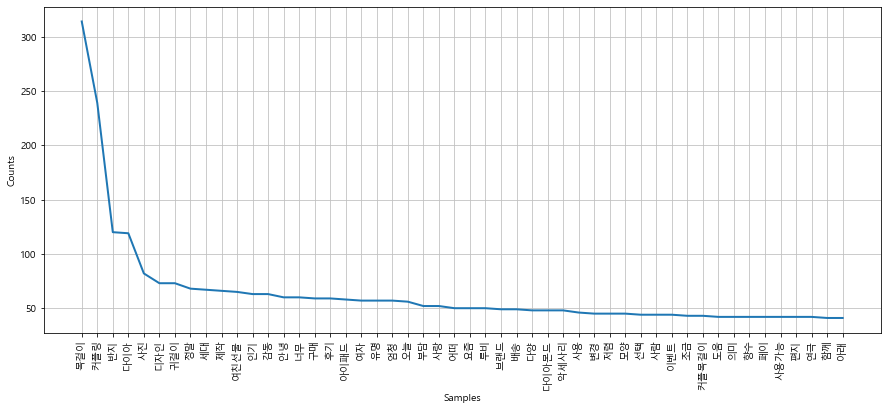

In [27]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

- 필요없는 단어 제거 - 수동으로 반복처리

In [29]:
# stop_list = ['선물','추천']
stopwords = '가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 한번 고급 커플 선물 추천'
stop_list = stopwords.split()
gift_list = [gift for gift in gift_list if gift not in stop_list]

In [30]:
gl = []
for gift in gift_list:
    if gift not in stop_list:
        gl.append(gift)
gift_list = gl

gift_list

['반지',
 '목걸이',
 '가디건',
 '모자',
 '어떠',
 '몇개',
 '추천제품들',
 '투척',
 '남녀',
 '커플룩',
 '오버',
 '니트',
 '가디건',
 '남녀',
 '체크',
 '라인',
 '오버',
 '가디건',
 '커플룩',
 '오버',
 '가디건',
 '남자',
 '여자',
 '가을',
 '겨울',
 '루즈',
 '니트',
 '남녀',
 '오버',
 '스냅',
 '가디건',
 '남녀',
 '오버',
 '패턴',
 '니트',
 '가디건',
 '컬러',
 '인기신상',
 '가을겨울',
 '오버',
 '세련',
 '니트가디건',
 '커플가디건',
 '남녀',
 '오버',
 '체크',
 '브이',
 '버튼',
 '가디건',
 '컬러',
 '아우터',
 '루즈',
 '타이',
 '카라',
 '커플룩',
 '가디건',
 '레인보우',
 '영문레터링',
 '포인트',
 '블랙볼캡',
 '커플모자',
 '야구모자',
 '브랜드',
 '모자',
 '쇼핑',
 '성공',
 '바라',
 '도움',
 '채택',
 '부탁',
 '파트너스',
 '지급',
 '디퓨저',
 '공장',
 '상품',
 '재구매율',
 '구매',
 '돌아',
 '마크',
 '후드티',
 '사인',
 '로고',
 '후디',
 '그레이',
 '안녕',
 '노미',
 '팔찌',
 '링크',
 '세상',
 '팔찌',
 '노미',
 '클래식',
 '링크',
 '찾아',
 '만들어',
 '아이돌분들',
 '자주',
 '착용',
 '연예인분들',
 '선호',
 '주얼리',
 '브랜드',
 '협찬',
 '진행',
 '이니셜',
 '탄생석',
 '별자리',
 '링크',
 '의미',
 '팔찌',
 '만들어',
 '팔찌',
 '팔찌',
 '유명',
 '소재',
 '최고급',
 '소재',
 '알러지',
 '분들',
 '안심',
 '착용',
 '샤워',
 '오래',
 '사용',
 '로즈골드',
 '골드',
 '색상',
 '세련',
 '실버색상',
 '가격대',
 '부담',
 '링크',
 '기념일',
 

- Wordcloud 그리기


In [31]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

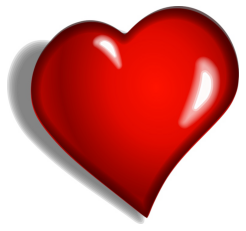

In [32]:
image = Image.open('data/heart.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [33]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('반지', 120),
 ('다이아', 119),
 ('사진', 82),
 ('디자인', 73),
 ('귀걸이', 73),
 ('정말', 68),
 ('세대', 67),
 ('제작', 66)]

In [34]:
wc = WordCloud(
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling = 0.2, background_color = 'white'

). generate_from_frequencies(dict(data))

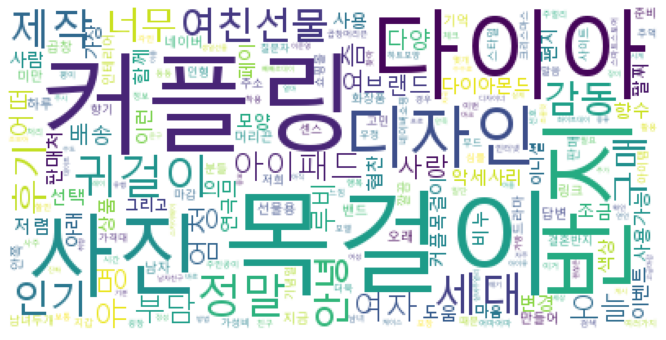

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [37]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))    
image_colors = ImageColorGenerator(mask)

In [38]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, background_color='white', mask=mask
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

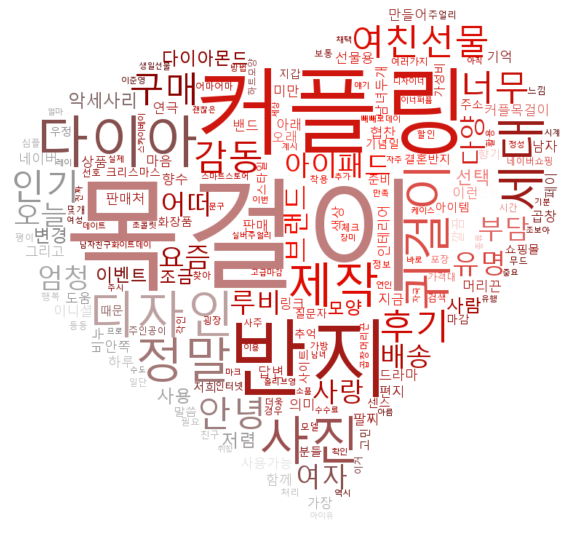

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()